In [468]:
#importing all the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as po
import json
import geopandas as gpd

In [497]:
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'browser'
#selecting browser for map plotting for easy rendering 

In [470]:
path = r"C:\Users\Harmanbeer Singh\Downloads\qol_states_2024.csv" #defining file path

In [471]:
df = pd.read_csv(path)

In [ ]:
#data checking

In [510]:
df.head()

,state,Total_Score,Quality_Of_Life,Affordability,Economy,Education_And_Health,Safety,id
0,Alabama,45.61,40,1,40,48,32,0400000US01
1,Alaska,40.93,50,42,22,30,45,0400000US02
2,Arizona,48.31,21,25,14,39,40,0400000US04
3,Arkansas,42.42,46,4,34,45,47,0400000US05
4,California,52.03,2,50,15,24,27,0400000US06


In [473]:
df.rename(columns={"QualityOfLifeTotalScore" : "Total_Score", "QualityOfLifeQualityOfLife" : "Quality_Of_Life", "QualityOfLifeAffordability": "Affordability", "QualityOfLifeEconomy": "Economy", "QualityOfLifeEducationAndHealth": "Education_And_Health", "QualityOfLifeSafety": "Safety"}, inplace = True)

In [474]:
#Data understanding

In [475]:
df.head(10)

,state,Total_Score,Quality_Of_Life,Affordability,Economy,Education_And_Health,Safety
0,Alabama,45.61,40,1,40,48,32
1,Alaska,40.93,50,42,22,30,45
2,Arizona,48.31,21,25,14,39,40
3,Arkansas,42.42,46,4,34,45,47
4,California,52.03,2,50,15,24,27
5,Colorado,53.37,12,28,18,10,43
6,Connecticut,52.21,24,45,46,3,14
7,Delaware,52.33,48,21,29,22,17
8,Florida,58.07,5,33,6,25,15
9,Georgia,50.76,18,17,13,43,22


In [476]:
df.tail(10)

,state,Total_Score,Quality_Of_Life,Affordability,Economy,Education_And_Health,Safety
40,South Dakota,53.13,41,23,5,27,29
41,Tennessee,48.85,34,9,21,40,38
42,Texas,49.00,11,34,26,36,33
43,Utah,56.84,29,6,2,8,41
44,Vermont,57.52,42,43,8,2,9
45,Virginia,58.73,20,16,23,15,11
46,Washington,52.11,9,37,4,14,48
47,West Virginia,46.84,45,2,44,44,20
48,Wisconsin,57.92,10,32,24,13,12
49,Wyoming,58.00,39,8,16,32,3


In [477]:
df.shape

(50, 7)

In [478]:
df.describe()

,Total_Score,Quality_Of_Life,Affordability,Economy,Education_And_Health,Safety
count,50.000000,50.00000,50.00000,50.00000,50.00000,50.00000
mean,51.830200,25.50000,25.50000,25.50000,25.50000,25.50000
std,5.728049,14.57738,14.57738,14.57738,14.57738,14.57738
min,39.770000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,48.430000,13.25000,13.25000,13.25000,13.25000,13.25000
50%,52.160000,25.50000,25.50000,25.50000,25.50000,25.50000
75%,56.735000,37.75000,37.75000,37.75000,37.75000,37.75000
max,62.650000,50.00000,50.00000,50.00000,50.00000,50.00000


In [511]:
#data cleaning

In [479]:
df.nunique()

state                   50
Total_Score             49
Quality_Of_Life         50
Affordability           50
Economy                 50
Education_And_Health    50
Safety                  50
dtype: int64

In [480]:
missing_values = ["N/A" , "na" , np.nan]
data = pd.read_csv(path, na_values = missing_values)

In [481]:
df.isnull().sum()

state                   0
Total_Score             0
Quality_Of_Life         0
Affordability           0
Economy                 0
Education_And_Health    0
Safety                  0
dtype: int64

In [482]:
df.isnull().any()

state                   False
Total_Score             False
Quality_Of_Life         False
Affordability           False
Economy                 False
Education_And_Health    False
Safety                  False
dtype: bool

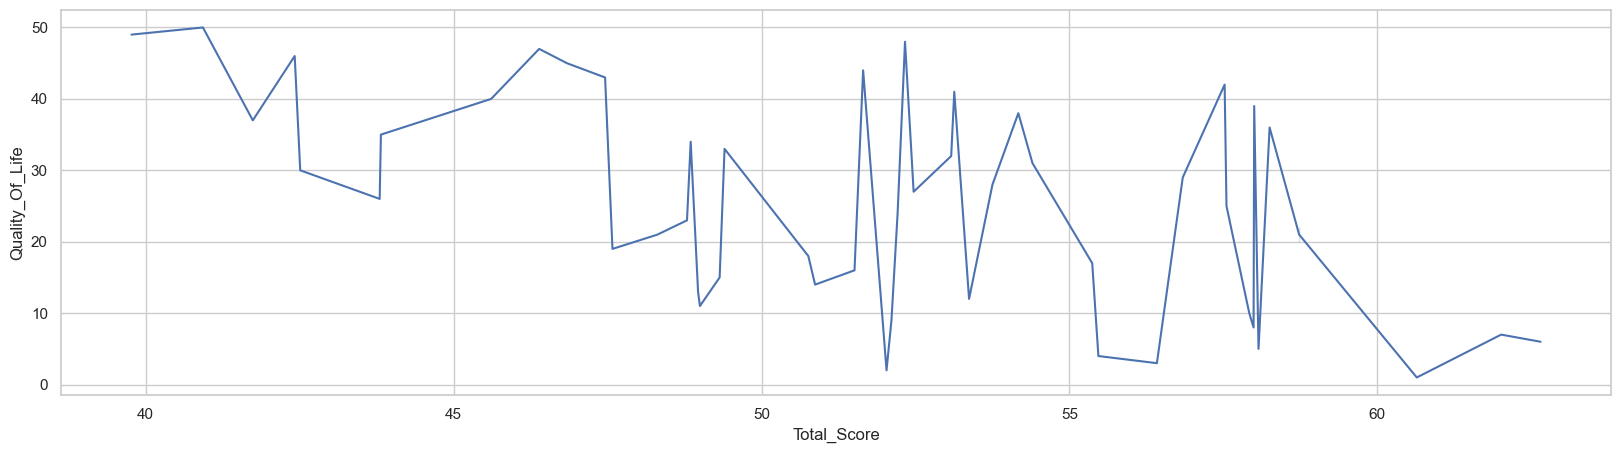

In [483]:
sns.lineplot(x = 'Total_Score', y = 'Quality_Of_Life', data = df,)
sns.set({"figure.figsize": (20, 5)}, style = "whitegrid")

#using seaborn to plot a reltion between quality of life and total score

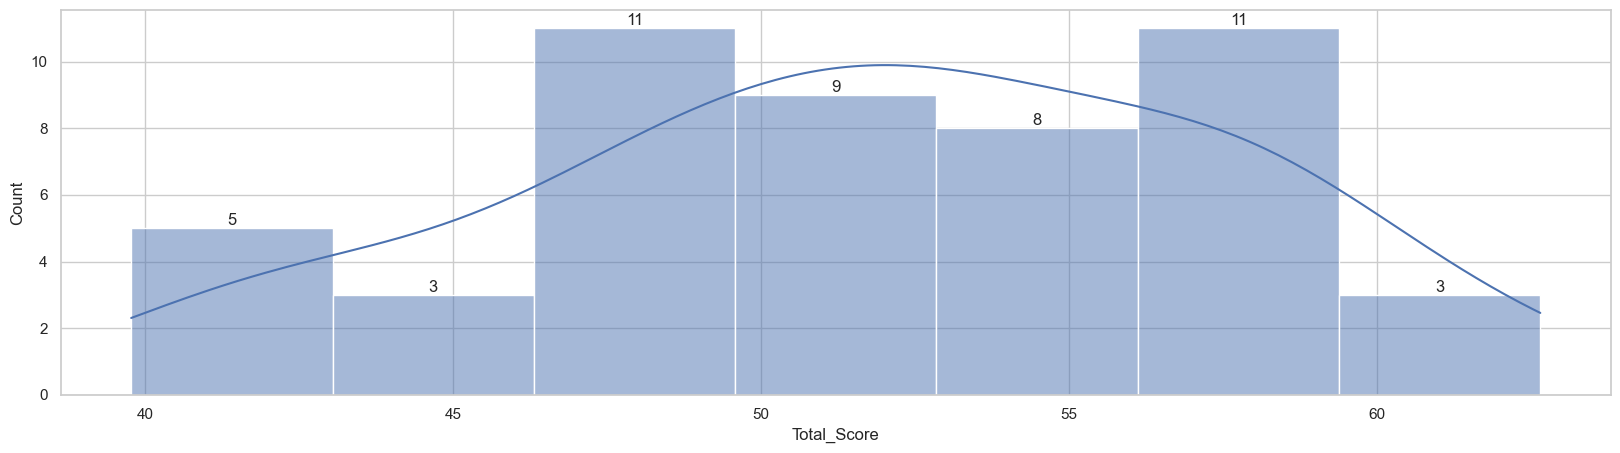

In [484]:
ax = sns.histplot(x = 'Total_Score', data = df, kde = True)
sns.set({"figure.figsize": (20, 5)}, style = "whitegrid")
for bars in ax.containers:
        ax.bar_label(bars)

#hisogram plot and kernel density to see the mode total scores

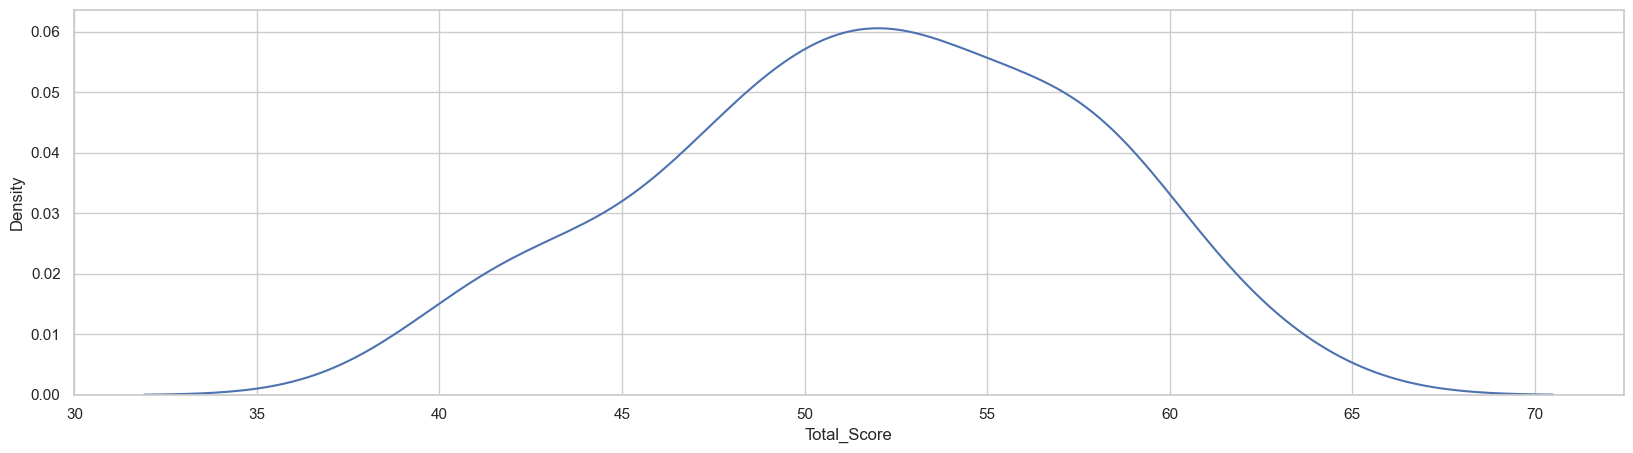

In [485]:
ax = sns.kdeplot(data=df, x='Total_Score')
sns.set({"figure.figsize": (20, 5)}, style = "whitegrid")
for bars in ax.containers:
        ax.bar_label(bars)

In [486]:
hey = r"C:\Users\Harmanbeer Singh\Downloads\gz_2010_us_040_00_500k.json"
#path for geojson file for map of US states

In [487]:
USA = usa_geojson = gpd.read_file(hey)
dfo = gpd.read_file(path)

<Axes: >

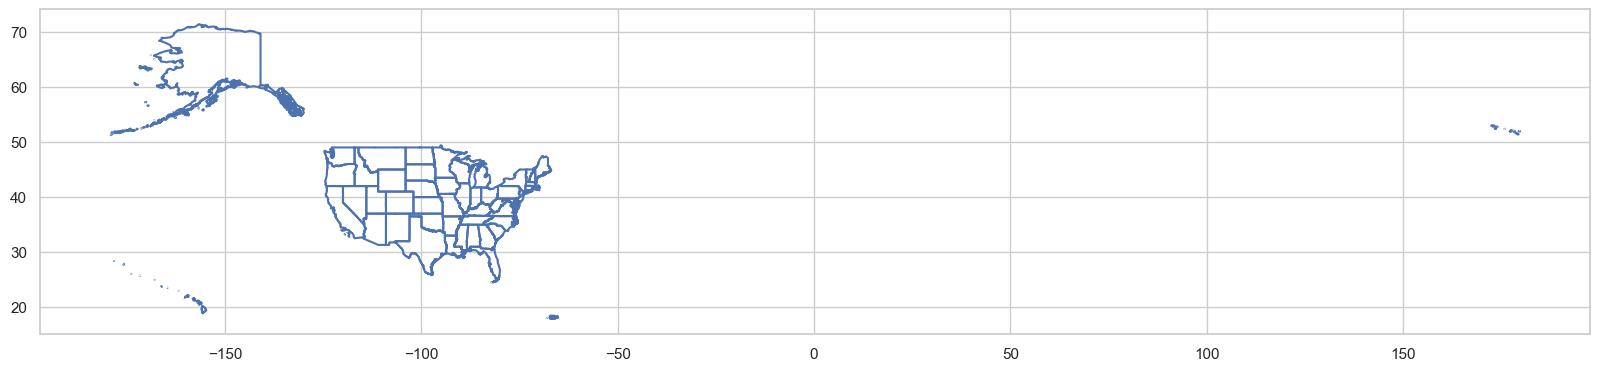

In [488]:
USA.boundary.plot(figsize = (20,100))
#to check wether the geojson file is the right one chosen using pandas

In [489]:
usa_states = json.load(open(hey))

In [490]:
usa_states['features'][1]['properties']

{'GEO_ID': '0400000US25',
 'STATE': '25',
 'NAME': 'Massachusetts',
 'LSAD': '',
 'CENSUSAREA': 7800.058}

In [491]:
stateidmap = {}
for feature in usa_states['features']:
    feature['id'] = feature['properties']['GEO_ID']
    stateidmap[feature['properties']['NAME']] = feature['id']

#implementing geospatial ids to all the states

In [492]:
stateidmap

{'Maine': '0400000US23',
 'Massachusetts': '0400000US25',
 'Michigan': '0400000US26',
 'Montana': '0400000US30',
 'Nevada': '0400000US32',
 'New Jersey': '0400000US34',
 'New York': '0400000US36',
 'North Carolina': '0400000US37',
 'Ohio': '0400000US39',
 'Pennsylvania': '0400000US42',
 'Rhode Island': '0400000US44',
 'Tennessee': '0400000US47',
 'Texas': '0400000US48',
 'Utah': '0400000US49',
 'Washington': '0400000US53',
 'Wisconsin': '0400000US55',
 'Puerto Rico': '0400000US72',
 'Maryland': '0400000US24',
 'Alabama': '0400000US01',
 'Alaska': '0400000US02',
 'Arizona': '0400000US04',
 'Arkansas': '0400000US05',
 'California': '0400000US06',
 'Colorado': '0400000US08',
 'Connecticut': '0400000US09',
 'Delaware': '0400000US10',
 'District of Columbia': '0400000US11',
 'Florida': '0400000US12',
 'Georgia': '0400000US13',
 'Hawaii': '0400000US15',
 'Idaho': '0400000US16',
 'Illinois': '0400000US17',
 'Indiana': '0400000US18',
 'Iowa': '0400000US19',
 'Kansas': '0400000US20',
 'Kentucky

In [493]:
df['id'] = df['state'].apply(lambda x: stateidmap[x])

In [494]:
df.head()

,state,Total_Score,Quality_Of_Life,Affordability,Economy,Education_And_Health,Safety,id
0,Alabama,45.61,40,1,40,48,32,0400000US01
1,Alaska,40.93,50,42,22,30,45,0400000US02
2,Arizona,48.31,21,25,14,39,40,0400000US04
3,Arkansas,42.42,46,4,34,45,47,0400000US05
4,California,52.03,2,50,15,24,27,0400000US06


In [ ]:
#using plotly library showing different score sets on interactive map of USA

In [498]:
po.choropleth(df, locations = 'id', geojson = usa_states, color = 'Total_Score', hover_name = 'state')

In [499]:
po.choropleth(df, locations = 'id', geojson = usa_states, color = 'Quality_Of_Life', hover_name = 'state')

In [500]:
po.choropleth(df, locations = 'id', geojson = usa_states, color = 'Affordability', hover_name = 'state')

In [501]:
po.choropleth(df, locations = 'id', geojson = usa_states, color = 'Economy', hover_name = 'state')

In [502]:
po.choropleth(df, locations = 'id', geojson = usa_states, color = 'Education_And_Health', hover_name = 'state')

In [503]:
po.choropleth(df, locations = 'id', geojson = usa_states, color = 'Safety', hover_name = 'state')

In [ ]:
#From the above plots we can have the top picks with respect to our most desirable attribute
#From plot of Total Score we can infer that Massachusetts, New jersey and New York are the best cities to live

In [ ]:
#we can verify our analysis from below!

In [509]:
df.sort_values(by = 'Total_Score', ascending = False).head(3)

,state,Total_Score,Quality_Of_Life,Affordability,Economy,Education_And_Health,Safety,id
20,Massachusetts,62.65,6,44,10,1,4,0400000US25
29,New Jersey,62.01,7,48,39,5,1,0400000US34
31,New York,60.64,1,46,37,16,2,0400000US36
